In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from utils.utils import get_outliers

In [89]:
DATA = '../data/ml_project1_data.csv'

df = pd.read_csv(DATA, sep='\t', )
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

- Null values in the Income column
- Dt_Customer should be datetime, not object

In [91]:
with pd.option_context(
    "display.float_format", "{:.2f}".format,
    'display.max_columns', None
):
    display(df.describe())

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.00,2240.00,2216.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00
mean,5592.16,1968.81,52247.25,0.44,0.51,49.11,303.94,26.30,166.95,37.53,27.06,44.02,2.33,4.08,2.66,5.79,5.32,0.07,0.07,0.07,0.06,0.01,0.01,3.00,11.00,0.15
std,3246.66,11.98,25173.08,0.54,0.54,28.96,336.60,39.77,225.72,54.63,41.28,52.17,1.93,2.78,2.92,3.25,2.43,0.26,0.26,0.26,0.25,0.11,0.10,0.00,0.00,0.36
min,0.00,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
25%,2828.25,1959.00,35303.00,0.00,0.00,24.00,23.75,1.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
50%,5458.50,1970.00,51381.50,0.00,0.00,49.00,173.50,8.00,67.00,12.00,8.00,24.00,2.00,4.00,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
75%,8427.75,1977.00,68522.00,1.00,1.00,74.00,504.25,33.00,232.00,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
max,11191.00,1996.00,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,263.00,362.00,15.00,27.00,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,11.00,1.00


- Maximum Income doesn't seem right
- Minimum Year_Birth being 1893 is also wrong
- Unbalanced dataset with just 15% Response being 1, others are 0.

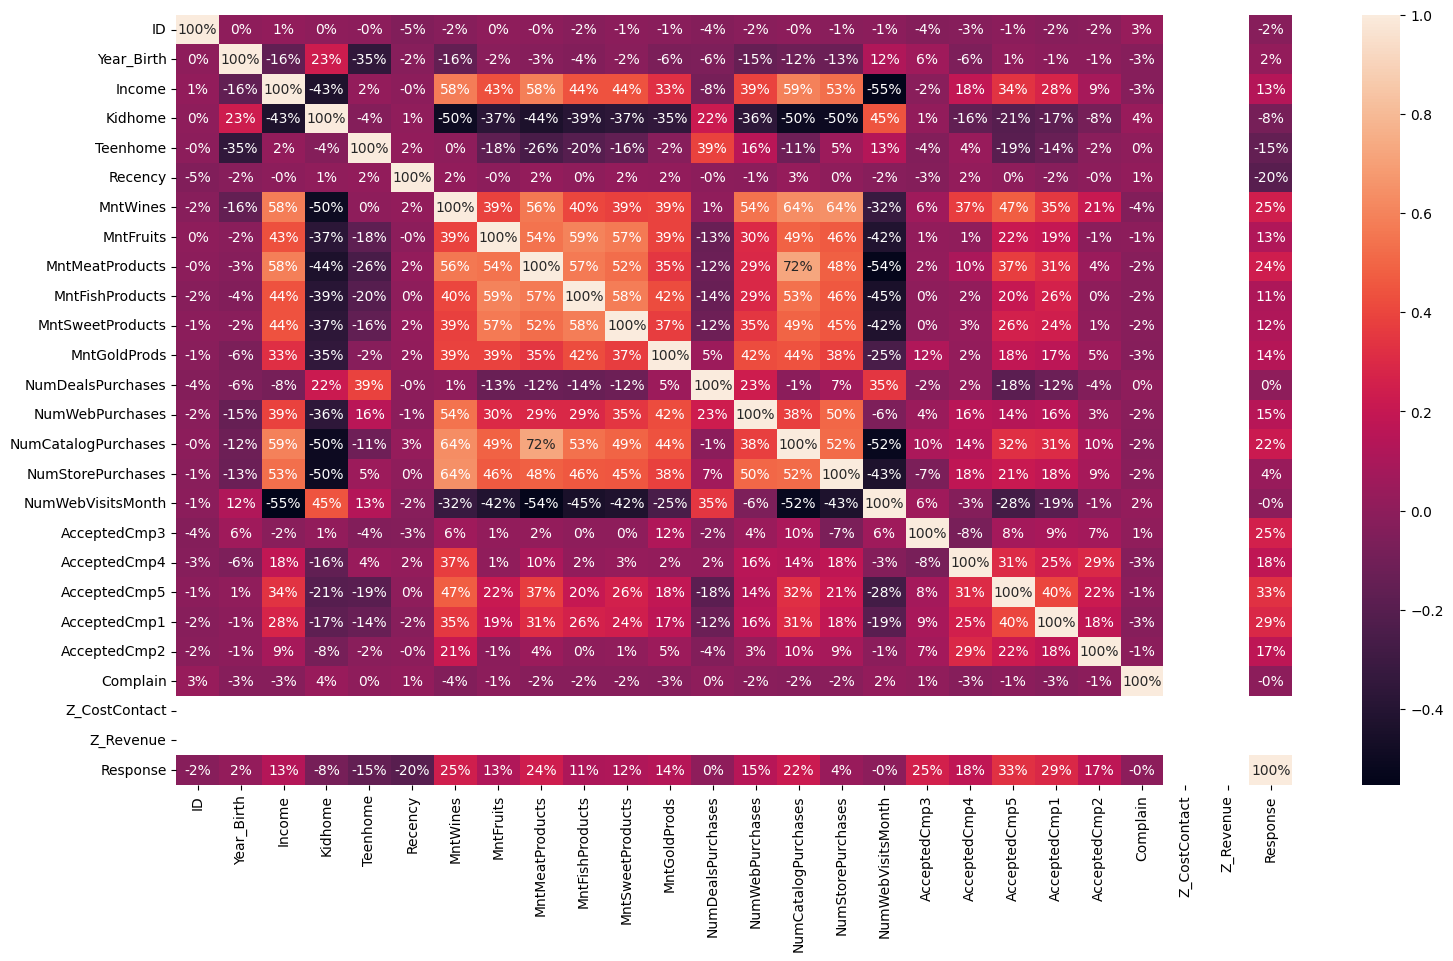

In [92]:
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(df.corr(numeric_only=True), ax=ax, annot=True, fmt=".0%")

plt.show()

In [93]:
df = df.dropna()  # remove rows with nan for the data analysis, just the rows where the income is nan, only 24 rows

In [94]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')  # converting to datetime

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

## Date related columns

In [96]:
# taking number of days each client is enrolled
df['DaysSinceEnrolled'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days

# taking years since enrolled
df['YearsSinceEnrolled'] = df['DaysSinceEnrolled'] // 365

# taking age of the client
df['Age'] = df['Dt_Customer'].dt.year.max() - df['Year_Birth']

In [97]:
# checking age distribution
df['Age'].describe()

count    2216.000000
mean       45.179603
std        11.985554
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

- Very likely the maximum age (Year_Birth) is a wrong input

In [98]:
# creating bins for the client age
bins = [0, 15, 30, 45, 60, df['Age'].max() + 1]
num_groups = len(bins) - 1
labels = ['0-15', '16-30', '31-45', '46-60', '61+']
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=bins,
    labels=labels
)

In [99]:
df['AgeGroup'].value_counts()

AgeGroup
31-45    965
46-60    727
61+      267
16-30    257
0-15       0
Name: count, dtype: int64

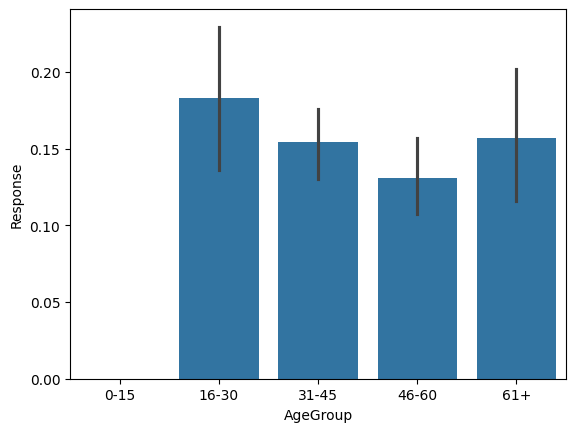

In [100]:
fig, ax = plt.subplots()

sns.barplot(df, x='AgeGroup', y='Response', estimator='mean', ax=ax)

plt.show()

- more customers between 31 and 45 years (mature database)
- the average response is higher for the younger group (16-30), but it may not be significant (standard deviation is high)

## Amount spent columns

In [101]:
amount_columns = ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']
df.head()[amount_columns]

,MntFishProducts,MntMeatProducts,MntFruits,MntSweetProducts,MntWines,MntGoldProds
0,172,546,88,88,635,88
1,2,6,1,1,11,6
2,111,127,49,21,426,42
3,10,20,4,3,11,5
4,46,118,43,27,173,15


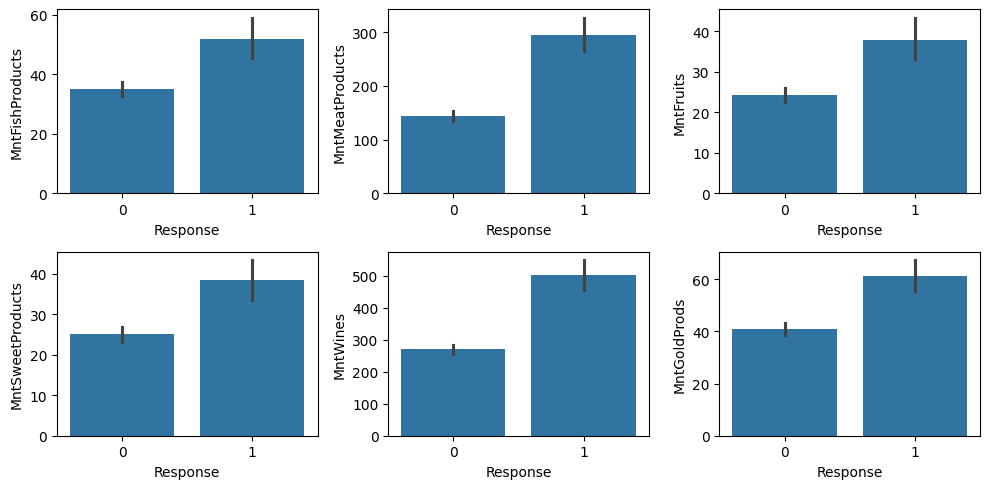

In [102]:
fig, ax = plt.subplots(nrows=2, ncols=3, tight_layout=True, figsize=(10,5))

ax = ax.flatten()

for i, col in enumerate(amount_columns):
    sns.barplot(data=df, x='Response', y=col, ax=ax[i])

- the average of the amount spent in those categories of products varies depending on the response in the last campaign

In [103]:
# creating a column with total amount spent and total regular products amount spent
df['MntTotal'] = df[amount_columns].sum(axis=1)
df['MntRegularProds'] = df[amount_columns[:-1]].sum(axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,DaysSinceEnrolled,YearsSinceEnrolled,Age,AgeGroup,MntTotal,MntRegularProds
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,663,1,57,46-60,1617,1529
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,113,0,60,46-60,27,21
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,312,0,49,46-60,776,734
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,139,0,30,16-30,53,48
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,161,0,33,31-45,422,407


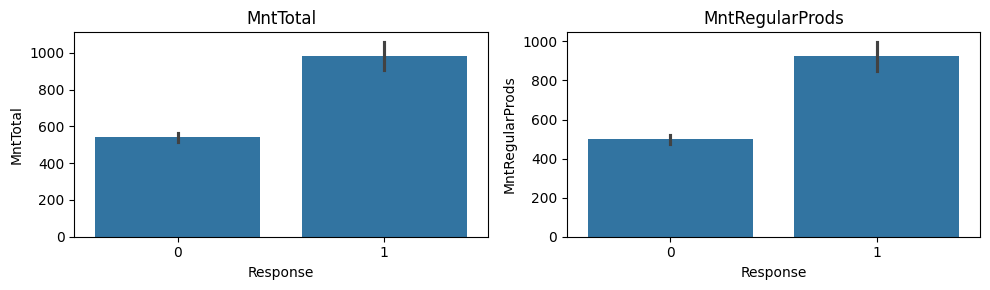

In [104]:
total_amount_columns = ['MntTotal', 'MntRegularProds']

fig, ax = plt.subplots(nrows=1, ncols=2, tight_layout=True, figsize=(10,3))

ax = ax.flatten()

for i, col in enumerate(total_amount_columns):
    sns.barplot(data=df, x='Response', y=col, ax=ax[i])
    ax[i].set_title(col)

- aggregating in total amount spent and total regular product amount spent may help predict the response target

## Dependent columns

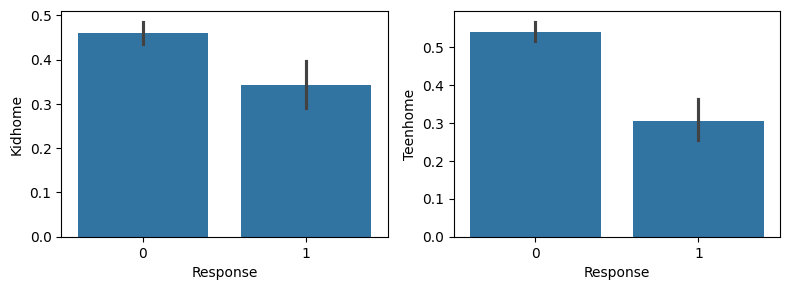

In [105]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3), tight_layout=True)

ax = ax.flatten()

sns.barplot(data=df, x='Response', y='Kidhome', ax=ax[0])
sns.barplot(data=df, x='Response', y='Teenhome', ax=ax[1])

plt.show()

- the average number of teenagers and kids at home is smaller when the response to the last campaing is 1

In [106]:
# creating a column with number of dependents (Kidhome and Teenhome) and a binary column flagging the presence of dependents
dependents_columns = ['Kidhome', 'Teenhome']
df['Dependents'] = df[dependents_columns].sum(axis=1)
df['hasDependent'] = (df['Dependents'] > 0).astype(int)
df.head()[['Kidhome', 'Teenhome', 'Dependents', 'hasDependent']]

,Kidhome,Teenhome,Dependents,hasDependent
0,0,0,0,0
1,1,1,2,1
2,0,0,0,0
3,1,0,1,1
4,1,0,1,1


In [107]:
df['hasDependent'].value_counts()

hasDependent
1    1583
0     633
Name: count, dtype: int64

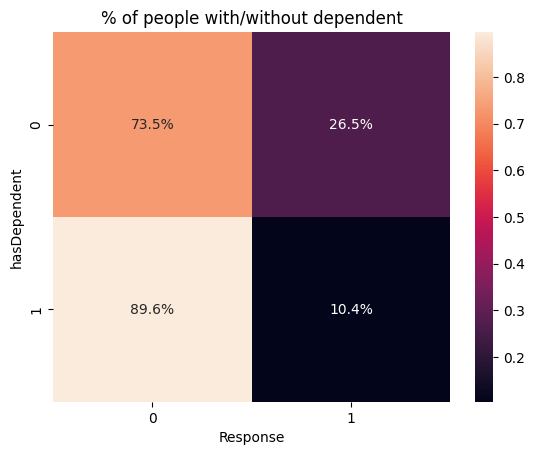

pvalue of the chi-squared statistic test 1.6468336358189056e-21


In [108]:
from scipy.stats import chi2_contingency

fig, ax = plt.subplots()

contingency_table = pd.crosstab(df['hasDependent'], df['Response'])

sns.heatmap( contingency_table.div(contingency_table.sum(axis=1), axis=0) , annot=True, fmt='.1%', ax=ax)

ax.set_title('% of people with/without dependent')

plt.show()

chi2, p, dof, expected = chi2_contingency(contingency_table)

print('pvalue of the chi-squared statistic test', p)


- from those with no dependent the proportion of people that responded is higher compared to those with dependent that responded

## Marital Status

In [109]:
# changing the marital status to be more meaningful
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [110]:
marital_status_mapping = {
    'Alone': 'Single',
    'Absurd': 'Other',
    'YOLO': 'Other',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Together': 'Partner',
    'Married': 'Partner'
}

df['Marital_Status'] = df['Marital_Status'].replace(marital_status_mapping)

In [111]:
df['Marital_Status'].value_counts()

Marital_Status
Partner    1430
Single      782
Other         4
Name: count, dtype: int64

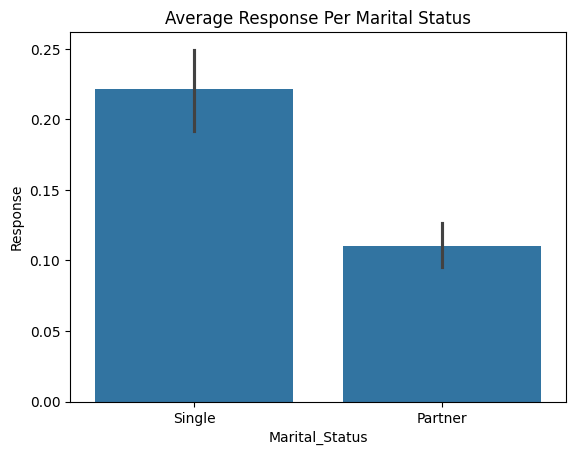

In [112]:
fig, ax = plt.subplots()

sns.barplot(data=df[df['Marital_Status'] != 'Other'], x='Marital_Status', y='Response', ax=ax)

ax.set_title('Average Response Per Marital Status')

plt.show()

- Apparently the average response is higher for single than for partners

## Education

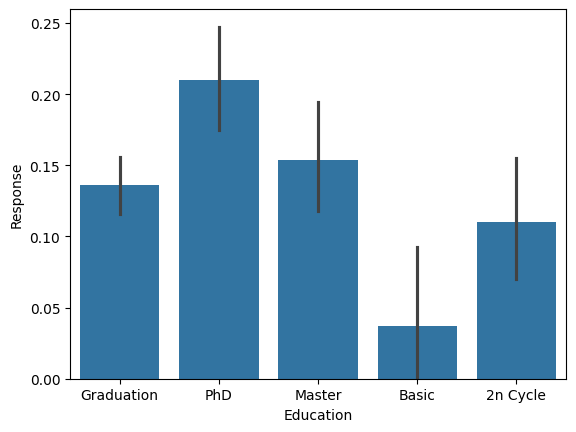

In [113]:
fig, ax = plt.subplots()

sns.barplot(data=df, x='Education', y='Response', ax=ax)

plt.show()

- The average response is higher for those with graduate or post-graduate education

## Campaings

In [114]:
# creating a column with total campaings accepted by customer
accepted_campaing_columns = [f'AcceptedCmp{i}' for i in range(1, 6)]
accepted_campaing_columns
df['AcceptedCmpTotal'] = df[accepted_campaing_columns].sum(axis=1)

In [115]:
df['AcceptedCmpTotal'].value_counts()

AcceptedCmpTotal
0    1757
1     323
2      81
3      44
4      11
Name: count, dtype: int64

In [116]:
df['hasAcceptedCmp'] = (df['AcceptedCmpTotal'] > 0).astype(int)
df['hasAcceptedCmp'].value_counts()

hasAcceptedCmp
0    1757
1     459
Name: count, dtype: int64

## Number of Purchases

In [117]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'DaysSinceEnrolled', 'YearsSinceEnrolled', 'Age', 'AgeGroup',
       'MntTotal', 'MntRegularProds', 'Dependents', 'hasDependent',
       'AcceptedCmpTotal', 'hasAcceptedCmp'],
      dtype='object')

In [118]:
df['NumTotalPurchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
df['NumTotalPurchases'].value_counts().head()

NumTotalPurchases
4    200
6    188
5    179
7    127
3    125
Name: count, dtype: int64

## Outliers

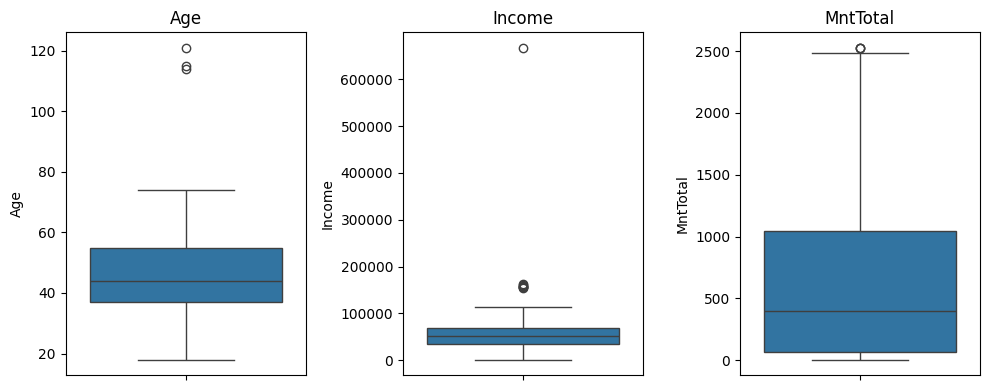

In [119]:
# outliers for age, income and MntTotal

columns = ['Age', 'Income', 'MntTotal']

fig, ax = plt.subplots(ncols=3, figsize=(10,4), tight_layout=True)

for col in columns:
    sns.boxplot(data=df, y=col, ax=ax[columns.index(col)])
    ax[columns.index(col)].set_title(col)

- Age has outliers. Ages higher than 100 years is not likely to happen
- Income has outliers. Income higher than 600k is not likely to happen

In [120]:
get_outliers(df=df, column='Age')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,YearsSinceEnrolled,Age,AgeGroup,MntTotal,MntRegularProds,Dependents,hasDependent,AcceptedCmpTotal,hasAcceptedCmp,NumTotalPurchases
192,7829,1900,2n Cycle,Single,36640.0,1,0,2013-09-26,99,15,...,0,114,61+,65,40,1,1,0,0,5
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,121,61+,22,20,1,1,0,0,3
339,1150,1899,PhD,Partner,83532.0,0,0,2013-09-26,36,755,...,0,115,61+,1853,1629,0,0,1,1,14


In [121]:
# remove age outliers (they have more than 100 years)
index_age_outliers = get_outliers(df=df, column='Age').index
df = df.drop(index_age_outliers)

In [122]:
get_outliers(df=df, column='Income')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,YearsSinceEnrolled,Age,AgeGroup,MntTotal,MntRegularProds,Dependents,hasDependent,AcceptedCmpTotal,hasAcceptedCmp,NumTotalPurchases
164,8475,1973,PhD,Partner,157243.0,0,1,2014-03-01,98,20,...,0,41,31-45,1608,1607,1,1,0,0,22
617,1503,1976,PhD,Partner,162397.0,1,1,2013-06-03,31,85,...,1,38,31-45,107,105,2,1,0,0,1
655,5555,1975,Graduation,Single,153924.0,0,0,2014-02-07,81,1,...,0,39,31-45,6,5,0,0,0,0,0
687,1501,1982,PhD,Partner,160803.0,0,0,2012-08-04,21,55,...,1,32,31-45,1717,1713,0,0,0,0,29
1300,5336,1971,Master,Partner,157733.0,1,0,2013-06-04,37,39,...,1,43,31-45,59,51,1,1,0,0,2
1653,4931,1977,Graduation,Partner,157146.0,0,0,2013-04-29,13,1,...,1,37,31-45,1730,1729,0,0,0,0,28
2132,11181,1949,PhD,Partner,156924.0,0,0,2013-08-29,85,2,...,0,65,61+,8,7,0,0,0,0,0
2233,9432,1977,Graduation,Partner,666666.0,1,0,2013-06-02,23,9,...,1,37,31-45,62,50,1,1,0,0,7


In [123]:
# removing income outliers (more than 600000 of income)
df = df.drop(df[df['Income'] > 600000].index)

In [124]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,DaysSinceEnrolled,YearsSinceEnrolled,Age,MntTotal,MntRegularProds,Dependents,hasDependent,AcceptedCmpTotal,hasAcceptedCmp,NumTotalPurchases
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,5585.160940,1968.913653,51958.810579,0.441682,0.505877,2013-07-10 06:51:25.714285824,49.019439,305.287523,26.329566,167.029837,...,353.714286,0.484177,45.086347,607.268083,563.342224,0.947559,0.714286,0.298373,0.207052,12.566908
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,18.000000,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,35233.500000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,...,180.000000,0.000000,37.000000,69.000000,55.750000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,5454.500000,1970.000000,51371.000000,0.000000,0.000000,2013-07-08 00:00:00,49.000000,175.500000,8.000000,68.000000,...,356.000000,0.000000,44.000000,397.000000,343.000000,1.000000,1.000000,0.000000,0.000000,12.000000
75%,8418.500000,1977.000000,68487.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,...,529.000000,1.000000,55.000000,1048.000000,964.000000,1.000000,1.000000,0.000000,0.000000,18.250000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,699.000000,1.000000,74.000000,2525.000000,2491.000000,3.000000,1.000000,4.000000,1.000000,32.000000
std,3247.523735,11.701599,21527.278844,0.536955,0.544253,NaN,28.943121,337.322940,39.744052,224.254493,...,202.494886,0.499863,11.701599,602.513364,576.934299,0.749466,0.451856,0.679570,0.405285,7.205427


## Removing columns

In [125]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'DaysSinceEnrolled', 'YearsSinceEnrolled', 'Age', 'AgeGroup',
       'MntTotal', 'MntRegularProds', 'Dependents', 'hasDependent',
       'AcceptedCmpTotal', 'hasAcceptedCmp', 'NumTotalPurchases'],
      dtype='object')

In [126]:
columns_to_drop = ['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue']

df = df.drop(columns_to_drop, axis=1)

df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,YearsSinceEnrolled,Age,AgeGroup,MntTotal,MntRegularProds,Dependents,hasDependent,AcceptedCmpTotal,hasAcceptedCmp,NumTotalPurchases
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,1,57,46-60,1617,1529,0,0,0,0,22
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,60,46-60,27,21,2,1,0,0,4
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,0,49,46-60,776,734,0,0,0,0,20
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,0,30,16-30,53,48,1,1,0,0,6
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,0,33,31-45,422,407,1,1,0,0,14


In [127]:
filepath = '../data/cleaned_data.csv'
df.to_csv(filepath, index=False)

In [128]:
with pd.option_context(
    "display.float_format", "{:.2f}".format,
    "display.max_columns", None,
):
    display(df.describe())

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,DaysSinceEnrolled,YearsSinceEnrolled,Age,MntTotal,MntRegularProds,Dependents,hasDependent,AcceptedCmpTotal,hasAcceptedCmp,NumTotalPurchases
count,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00
mean,51958.81,0.44,0.51,49.02,305.29,26.33,167.03,37.65,27.05,43.93,2.32,4.09,2.67,5.81,5.32,0.07,0.07,0.07,0.06,0.01,0.01,0.15,353.71,0.48,45.09,607.27,563.34,0.95,0.71,0.30,0.21,12.57
std,21527.28,0.54,0.54,28.94,337.32,39.74,224.25,54.77,41.09,51.71,1.92,2.74,2.93,3.25,2.43,0.26,0.26,0.26,0.25,0.12,0.09,0.36,202.49,0.50,11.70,602.51,576.93,0.75,0.45,0.68,0.41,7.21
min,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.00,5.00,4.00,0.00,0.00,0.00,0.00,0.00
25%,35233.50,0.00,0.00,24.00,24.00,2.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,180.00,0.00,37.00,69.00,55.75,0.00,0.00,0.00,0.00,6.00
50%,51371.00,0.00,0.00,49.00,175.50,8.00,68.00,12.00,8.00,24.50,2.00,4.00,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,356.00,0.00,44.00,397.00,343.00,1.00,1.00,0.00,0.00,12.00
75%,68487.00,1.00,1.00,74.00,505.00,33.00,232.25,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,529.00,1.00,55.00,1048.00,964.00,1.00,1.00,0.00,0.00,18.25
max,162397.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,262.00,321.00,15.00,27.00,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,699.00,1.00,74.00,2525.00,2491.00,3.00,1.00,4.00,1.00,32.00
